### Load libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

!pip install lifelines

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=914d0d5ea31524da82602c0bcd658494614b95fdd3f5bbc4015d1d27674bd7fe
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


### Data Source

Loprinzi CL. Laurie JA. Wieand HS. Krook JE. Novotny PJ. Kugler JW. Bartel J. Law M. Bateman M. Klatt NE. et al. Prospective evaluation of prognostic variables from patient-completed questionnaires. North Central Cancer Treatment Group. Journal of Clinical Oncology. 12(3):601-7, 1994.

In [6]:
data = pd.read_excel("/content/drive/MyDrive/Bahan port/Survival Analysis/Survival Analisys.xlsx")
data.head()

,SURVIVAL TIME,GENDER,AGE,THROMBOCYTES,HEMATOCRIT,HEMOGLOBIN,LEUKOCYTES
0,3,2,6,24000,50.1,16.4,6410
1,4,2,19,121000,43.1,14.5,5610
2,2,1,36,36000,48.5,17.3,4540
3,2,2,9,50000,39.5,13.3,2860
4,3,1,23,103000,44.1,15.3,3210


In [7]:
data.shape

(200, 7)

In [10]:
data.dtypes

SURVIVAL TIME      int64
GENDER             int64
AGE                int64
THROMBOCYTES       int64
HEMATOCRIT       float64
HEMOGLOBIN       float64
LEUKOCYTES         int64
dtype: object

In [11]:
data.isnull().sum()

SURVIVAL TIME    0
GENDER           0
AGE              0
THROMBOCYTES     0
HEMATOCRIT       0
HEMOGLOBIN       0
LEUKOCYTES       0
dtype: int64

In [12]:
data.columns

Index(['SURVIVAL TIME', 'GENDER', 'AGE', 'THROMBOCYTES', 'HEMATOCRIT',
       'HEMOGLOBIN', 'LEUKOCYTES'],
      dtype='object')

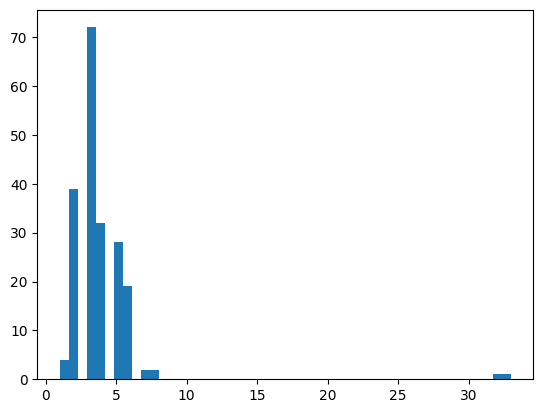

In [13]:
T = data["SURVIVAL TIME"]

plt.hist(T, bins = 50)
plt.show()

## Fitting a non-parametric model [Kaplan Meier Curve]

<Axes: xlabel='timeline'>

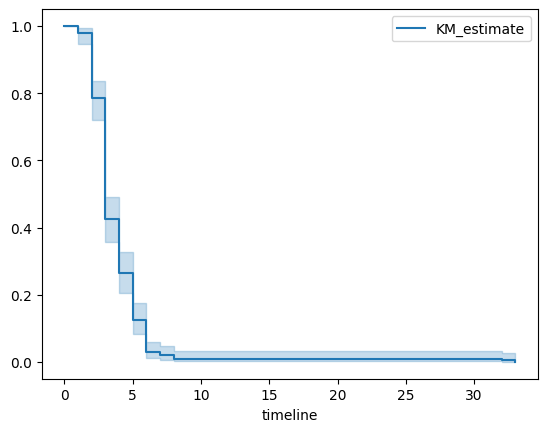

In [14]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

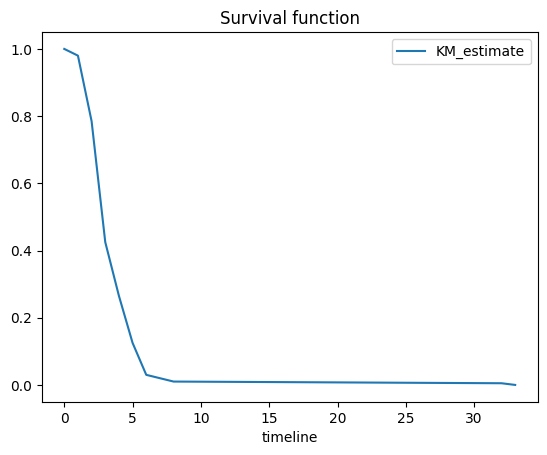

In [15]:
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

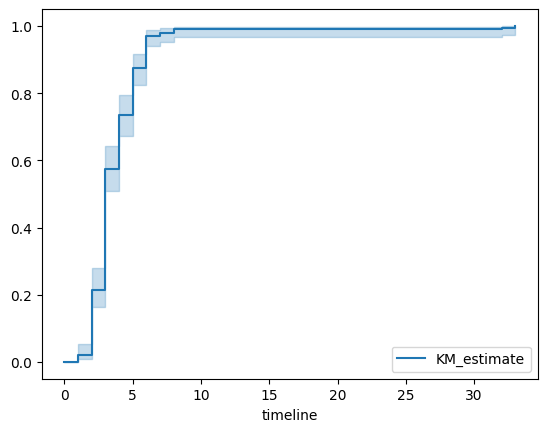

In [16]:
kmf.plot_cumulative_density()

In [17]:
kmf.median_survival_time_

3.0

In [18]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

3.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     3.0                     3.0


Text(0.5, 1.0, 'Survival of different gender group')

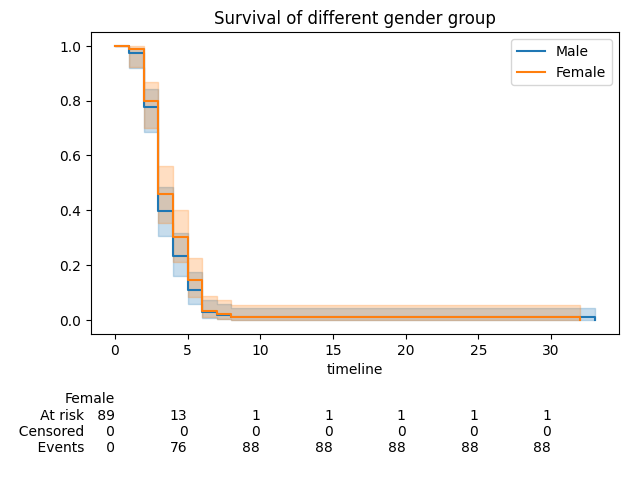

In [21]:
ax = plt.subplot(111)

m = (data["GENDER"] == 1)

kmf.fit(durations = T[m], label = "Male")
kmf.plot_survival_function(ax = ax)

kmf.fit(T[~m], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

plt.title("Survival of different gender group")

## Fitting Cox Proportional Hazard Model

The Cox proportional hazards model, by contrast, is not a fully parametric model. Rather it is a semi-parametric model because even if the regression parameters (the betas) are known, the distribution of the outcome remains unknown.

[Cox Proportional Hazard Model (lifelines webpage)](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html)

Cox proportional hazards regression model assumptions includes:

* Independence of survival times between distinct individuals in the sample,
* A multiplicative relationship between the predictors and the hazard, and
* A constant hazard ratio over time. This assumption implies that, the hazard curves for the groups should be proportional and cannot cross.

### Hazard and Hazard Ratio

* Hazard is defined as the slope of the survival curve — a measure of how rapidly subjects are dying.
* The hazard ratio compares two treatments. If the hazard ratio is 2.0, then the rate of deaths in one treatment group is twice the rate in the other group.

In [22]:
data.head()

,SURVIVAL TIME,GENDER,AGE,THROMBOCYTES,HEMATOCRIT,HEMOGLOBIN,LEUKOCYTES
0,3,2,6,24000,50.1,16.4,6410
1,4,2,19,121000,43.1,14.5,5610
2,2,1,36,36000,48.5,17.3,4540
3,2,2,9,50000,39.5,13.3,2860
4,3,1,23,103000,44.1,15.3,3210


In [23]:
cph = CoxPHFitter()
cph.fit(data, duration_col = 'SURVIVAL TIME')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 200 total observations, 0 right-censored observations>
             duration col = 'SURVIVAL TIME'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 200
   partial log-likelihood = -845.55
         time fit was run = 2023-11-26 05:13:52 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
GENDER        -0.19       0.83       0.15            -0.49             0.12                 0.61                 1.12
AGE           -0.02       0.98       0.01            -0.04            -0.01                 0.96                 0.99
THROMBOCYTES  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
HEMATOCRIT     0.02       1.02       0.04            -0.06             0.10                 0.95                 1.11
HEMOGLOBIN    -0.05       0.96       0.12            -0.29             0.20                 0.75                 1.22
LEUKOCYTES    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

               cmp to     z      p   -log2(p)
covariate                                    
GENDER           0.00 -1.20   0.23       2.13
AGE              0.00 -2.70   0.01       7.16
THROMBOCYTES     0.00 -4.12 <0.005      14.71
HEMATOCRIT       0.00  0.57   0.57       0.82
HEMOGLOBIN       0.00 -0.37   0.71       0.49
LEUKOCYTES       0.00 -0.74   0.46       1.12
---
Concordance = 0.68
Partial AIC = 1703.09
log-likelihood ratio test = 35.37 on 6 df
-log2(p) of ll-ratio test = 18.06

### Interpretation

* Wt.loss has a coefficient of about -0.01.

* We can recall that in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring.
The value $exp(-0.01)$ is called the hazard ratio.

* Here, a one unit increase in wt loss means the baseline hazard will increase by a factor
of $exp(-0.01)$ = 0.99 -> about a 1% decrease.

* Similarly, the values in the ecog column are: \[0 = asymptomatic, 1 = symptomatic but completely ambulatory, 2 = in bed $<$50\% of the day\]. The value of the coefficient associated with ecog2, $exp(1.20)$, is the value of ratio of hazards associated with being "in bed $<$50% of the day (coded as 2)" compared to asymptomatic (coded as 0, base category).

<Axes: xlabel='log(HR) (95% CI)'>

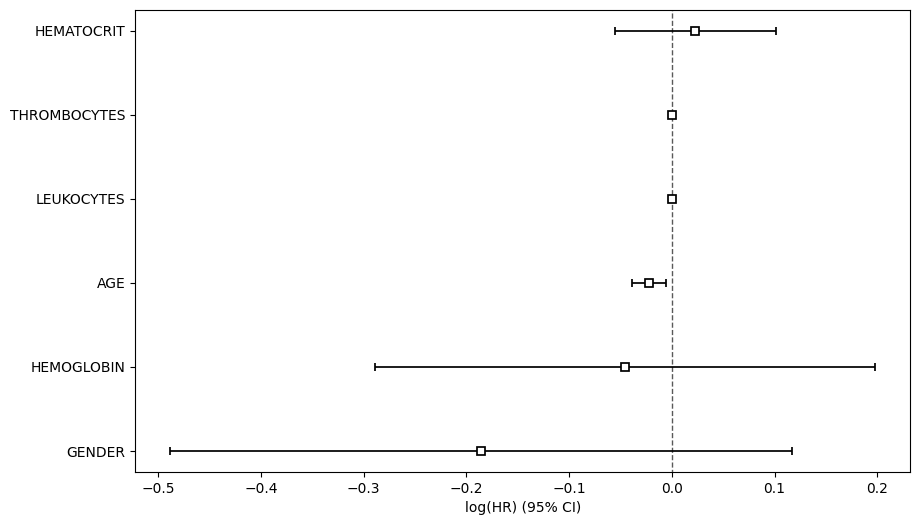

In [24]:
plt.subplots(figsize=(10, 6))
cph.plot()

<Axes: >

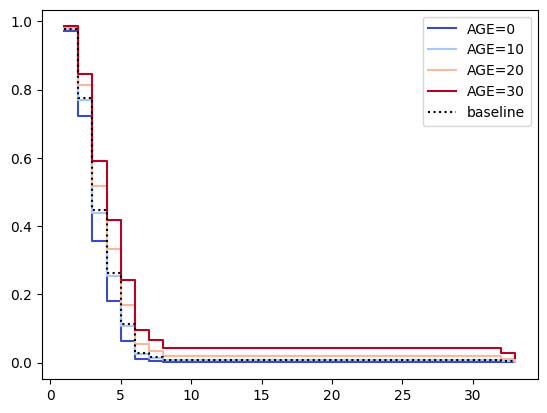

In [26]:
cph.plot_partial_effects_on_outcome(covariates = 'AGE',
                                    values = [0, 10,20, 30],
                                    cmap = 'coolwarm')

In [27]:
cph.check_assumptions(data, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 200 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                   test_statistic      p  -log2(p)
AGE          km              7.95 <0.005      7.70
             rank            9.94 <0.005      9.27
GENDER       km              0.01   0.90      0.14
             rank            0.00   1.00      0.00
HEMATOCRIT   km              0.06   0.80      0.32
             rank            0.16   0.69      0.54
HEMOGLOBIN   km              0.47   0.49      1.02
             rank            0.70   0.40      1.31
LEUKOCYTES   km              0.21   0.65      0.63
             rank            0.00   0.97      0.04
THROMBOCYTES km              0.31   0.58      0.80
             rank            0.27   0.60      0.73



1. Variable 'AGE' failed the non-proportional test: p-value is 0.0016.

   Advice 1: the functional form of the variable 'AGE' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'AGE' using pd.cut, and then specify it in `strata=['AGE',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varyi

[]

In [28]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(cph, data, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 200 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic      p  -log2(p)
AGE                     9.94 <0.005      9.27
GENDER                  0.00   1.00      0.00
HEMATOCRIT              0.16   0.69      0.54
HEMOGLOBIN              0.70   0.40      1.31
LEUKOCYTES              0.00   0.97      0.04
THROMBOCYTES            0.27   0.60      0.73

## Parametric [Accelerated Failure Time Model (AFT)]

[AFT Lifelines package webpage](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#accelerated-failure-time-models)

In [30]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter


# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

# Fit to data
for model in [wb, ex, log, loglogis]:
  model.fit(durations = data["SURVIVAL TIME"])

  # Print AIC
  print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 873.4608339332216
The AIC value for ExponentialFitter is 943.818265122124
The AIC value for LogNormalFitter is 748.3788404949802
The AIC value for LogLogisticFitter is 728.7117777097735


### Fit the weibull fitter and print summary

In [31]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data, duration_col='SURVIVAL TIME')

weibull_aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 200 total observations, 0 right-censored observations>
             duration col = 'SURVIVAL TIME'
   number of observations = 200
number of events observed = 200
           log-likelihood = -424.485
         time fit was run = 2023-11-26 05:16:57 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                            
lambda_ AGE           0.009      1.009      0.005           -0.001            0.019                0.999                1.020
        GENDER        0.091      1.095      0.096           -0.097            0.279                0.907                1.321
        HEMATOCRIT   -0.021      0.979      0.026           -0.072            0.031                0.930                1.031
        HEMOGLOBIN    0.108      1.114      0.080           -0.048            0.264                0.953                1.302
        LEUKOCYTES   -0.000      1.000      0.000           -0.000           -0.000                1.000                1.000
        THROMBOCYTES  0.000      1.000      0.000            0.000            0.000                1.000                1.000
        Intercept     0.375      1.455      0.528           -0.660            1.410                0.517                4.097
rho_    Intercept     0.487      1.628      0.043            0.403            0.572                1.496                1.771

                       cmp to      z       p   -log2(p)
param   covariate                                      
lambda_ AGE             0.000  1.827   0.068      3.885
        GENDER          0.000  0.945   0.345      1.536
        HEMATOCRIT      0.000 -0.786   0.432      1.212
        HEMOGLOBIN      0.000  1.354   0.176      2.509
        LEUKOCYTES      0.000 -2.652   0.008      6.967
        THROMBOCYTES    0.000  4.076 <0.0005     14.412
        Intercept       0.000  0.710   0.477      1.066
rho_    Intercept       0.000 11.328 <0.0005     96.407
---
Concordance = 0.643
AIC = 864.970
log-likelihood ratio test = 20.491 on 6 df
-log2(p) of ll-ratio test = 8.787

## Interpretation of the coefficients

* A unit increase in $x_i$ means the average/median survival time changes by a factor of $exp(b_i)$.
* Suppose $b_i$ was positive, then the factor $exp(b_i)$ is greater than 1, which will decelerate the event time since we divide time by the factor ⇿ increase mean/median survival. Hence, it will be a protective effect.
* Likewise, a negative $b_i$ will hasten the event time ⇿ reduce the mean/median survival time.
* This interpretation is opposite of how the sign influences event times in the Cox model!

## Example

* Sex, which contains [0: Male and 1: Female], has a positive coefficient.
* This means being a female subject compared to male changes mean/median survival time by exp(0.416) = 1.516,  approximately a 52% increase in mean/median survival time.

In [32]:
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)

3.105032670687812
3.481327058796286


<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

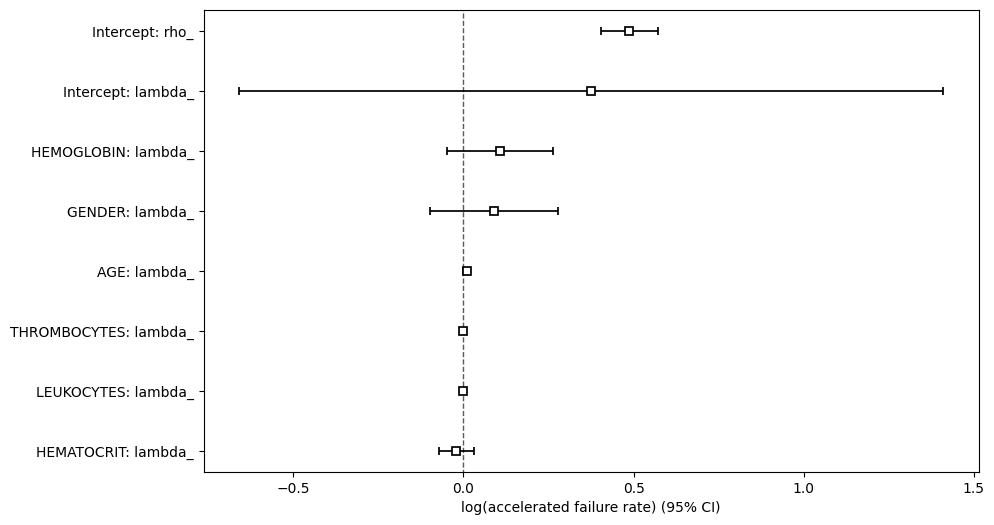

In [33]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

<Axes: >

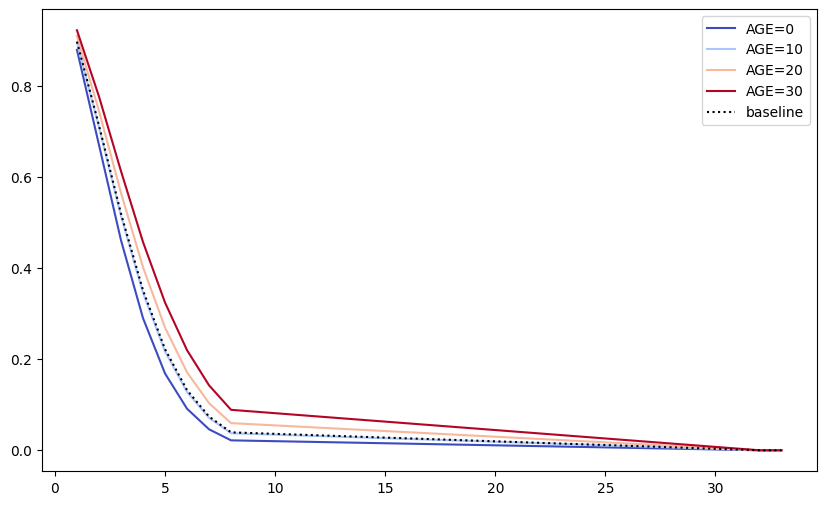

In [37]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('AGE', range(0, 40, 10), cmap='coolwarm')